In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
linkedin_df = pd.read_csv('linkedin-reviews.csv')
linkedin_df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [3]:
#Let’s have a look at the column information

In [4]:
print(linkedin_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB
None


Exploratory Data Analysis

In [5]:
#Distribution ratings

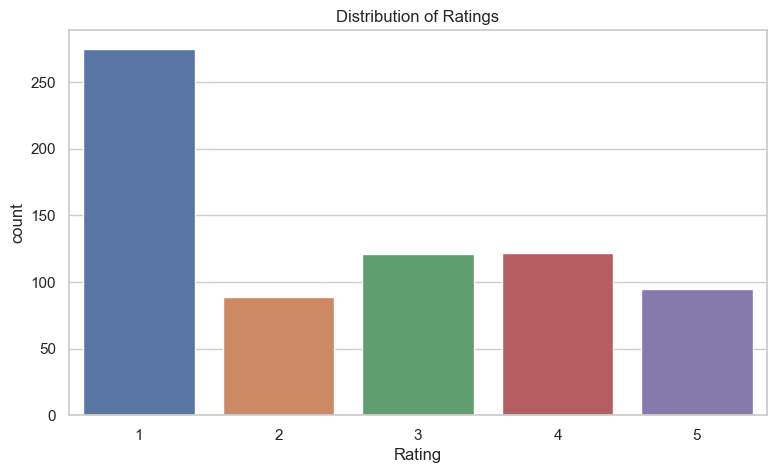

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
sns.countplot(data=linkedin_df, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()

Here’s the distribution of ratings from the LinkedIn reviews dataset. 
As you can see, it gives a clear picture of 
how many reviews fall into each rating category (from 1 to 5).

In [7]:
# Calculating the length of each review

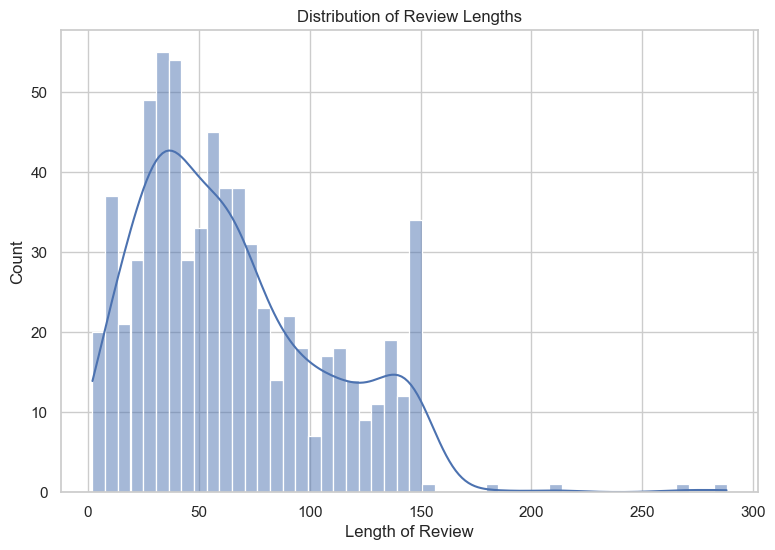

In [8]:
linkedin_df['Review Length'] = linkedin_df['Review'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))
sns.histplot(linkedin_df['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

Adding Sentiment Labels in the Data

Now, the next step is to label the data with sentiments. We can use Textblob for this task. TextBlob provides a polarity score ranging from -1 (very negative) to 1 (very positive) for a given text. We can use this score to classify each review’s sentiment as positive, neutral, or negative.

In [9]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


Let’s proceed to label the dataset using TextBlob for sentiment analysis.

In [10]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    #Analyzing  the sentiment of the review
    sentiment = TextBlob(review).sentiment
    #classifying based on polarity 
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

#applying Textblob sentiment analysis to the review
linkedin_df['Sentiment'] = linkedin_df['Review'].apply(textblob_sentiment_analysis)

#displaying the first few rows the sentiment
print(linkedin_df.head())

                                              Review  Rating  Review Length  \
0  Does absolutely nothing for a LinkedIn beginne...       1             80   
1                            Force close(galaxy tab)       1             23   
2  Slow and it tries to upload your contacts with...       1             61   
3  Add ability to customize the profile and move ...       4             90   
4  Good app, but it's a pain that it's not possib...       4            133   

  Sentiment  
0  Negative  
1   Neutral  
2  Negative  
3   Neutral  
4  Positive  


The dataset now includes sentiment labels for each review, classified as Positive, Negative, or Neutral based on the polarity score calculated by TextBlob.

# Analyzing App Reviews Sentiments

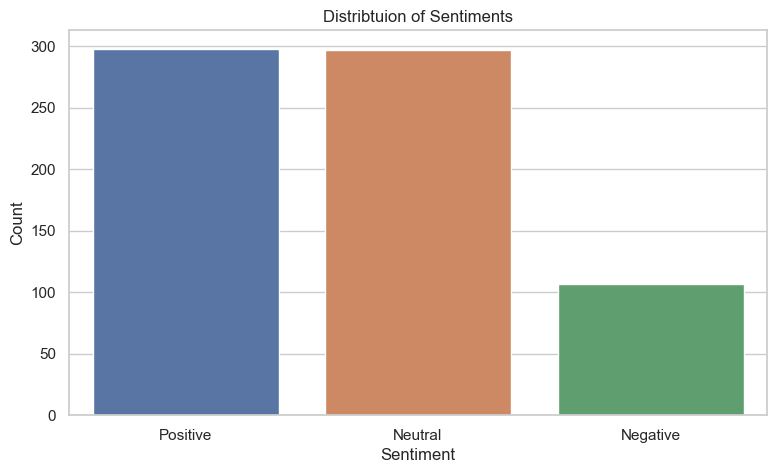

In [11]:
#Analyzing the distribtuion of sentiments 
sentiment_distribution = linkedin_df['Sentiment'].value_counts()

#plotting the distribution of sentiments
plt.figure(figsize=(9,5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribtuion of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

So, we can see although the app has low ratings, still the reviewers don’t use many negative words in the reviews for the app.

Next, we’ll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and the numerical rating. For this task, we can see how sentiments are distributed across different rating levels

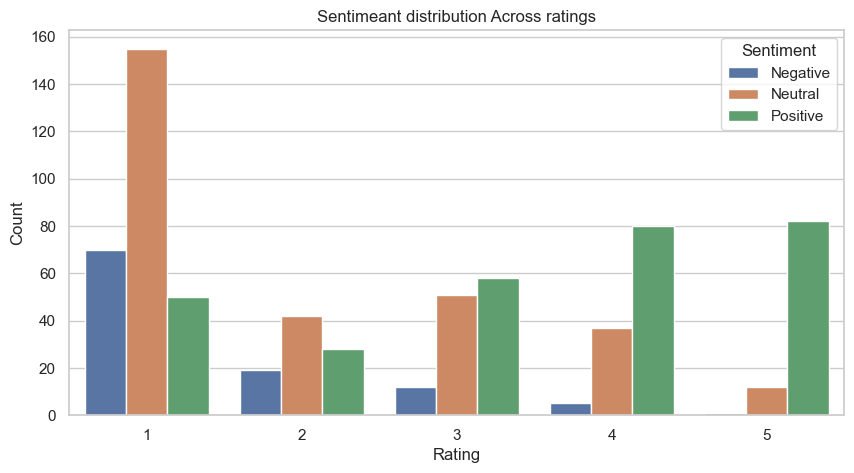

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=linkedin_df, x='Rating', hue='Sentiment')
plt.title('Sentimeant distribution Across ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

Now, let’s perform a text analysis to identify common words or themes within each sentiment category. It involves examining the most frequently occurring words in positive, negative, and neutral reviews using a word cloud:

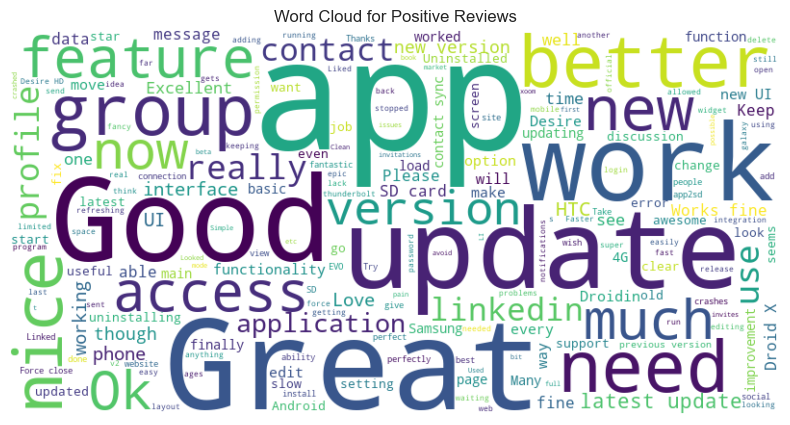

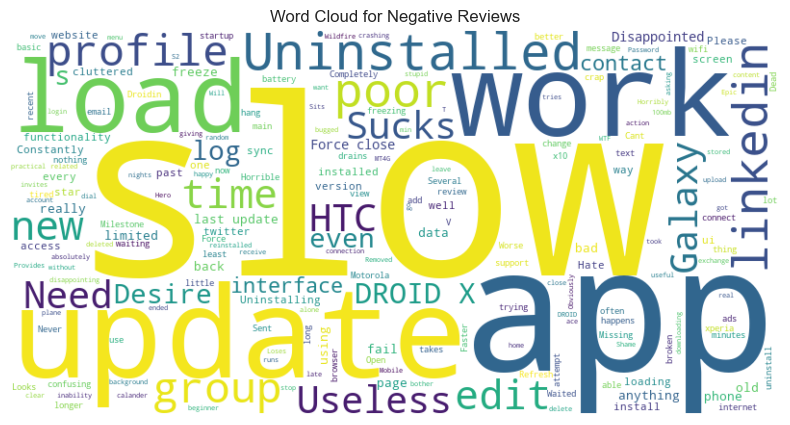

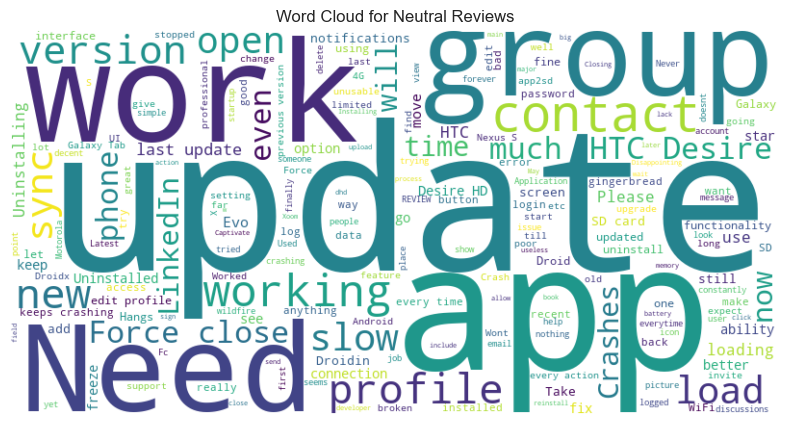

In [18]:
from wordcloud import WordCloud

#function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in linkedin_df[linkedin_df['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)      
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

#Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

So, this is how you can perform Reviews Sentiment Analysis using Python.